Import

In [1]:
%%capture
!git clone https://github.com/AndreasHammerKU/CardiacCTAnalysis.git
%cd CardiacCTAnalysis

Imports from Github Repository

In [2]:
%%capture
!pip install dash
import numpy as np

# Custom Imports
import utils.logger as logs
from baseline.BaseEnvironment import MedicalImageEnvironment
from baseline.BaseDataLoader import DataLoader
from baseline.BaseAgent import DQNAgent
from utils.parser import Experiment, ExperimentConfig
from baseline.BaseUnet import BaseUNetTrainer

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

dataset_folder = '/content/drive/MyDrive/CardiacCTAnalysis/Data'

Hyperparameters

In [3]:
debug = False

# Colab not enough RAM
preload_images = False
logger = logs.setup_logger(debug)

dataLoader = DataLoader(dataset_folder)

In [4]:
def run_training(config):
  train_env = MedicalImageEnvironment(logger=logger,
                                dataLoader=dataLoader,
                                image_list=['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30'],
                                agents=config.agents,
                                preload_images=preload_images)
  eval_env = MedicalImageEnvironment(logger=logger,
                                task="eval",
                                dataLoader=dataLoader,
                                image_list=['n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40'],
                                agents=config.agents)
  agent = DQNAgent(train_environment=train_env,
                   eval_environment=eval_env,
                   task="train",
                   logger=logger,
                   state_dim=train_env.state_size,
                   action_dim=train_env.n_actions,
                   attention=config.attention,
                   model_type=config.model_type,
                   agents=config.agents,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   decay=config.decay,
                   image_interval=config.image_interval,
                   evaluation_steps=config.evaluation_steps,
                   evaluation_interval=config.evaluation_interval,
                   experiment=config.experiment)

  agent.train_dqn()
  train_env.visualize_current_state()
  eval_env.visualize_current_state()

def run_test(config):
  test_env = MedicalImageEnvironment(logger=logger,
                                task="test",
                                dataLoader=dataLoader,
                                image_list=['n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50'],
                                agents=config.agents)
  agent = DQNAgent(test_environment=test_env,
                   task="test",
                   logger=logger,
                   state_dim=test_env.state_size,
                   action_dim=test_env.n_actions,
                   attention=config.attention,
                   agents=config.agents,
                   model_path=f"latest-model-{config.model_type}-{config.experiment.name}.pt",
                   model_type=config.model_type,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   evaluation_steps=25,
                   experiment=config.experiment
                   )

  agent.test_dqn()
  test_env.visualize_current_state()

Experiment 1: Network 3D - work alone

In [5]:
config = ExperimentConfig(model_type="Network3D",
                          max_steps=300,
                          image_interval=2,
                          episodes=40,
                          agents=6,
                          evaluation_steps=30,
                          evaluation_interval=10,
                          decay=100, # EPSILON = MIN_EPS - (MAX_EPS - MIN_EPS) * e^(-1 * current_step / decay)
                          attention=False,
                          experiment=Experiment.WORK_ALONE
                          )

INFO:Logger:Episode 1: Total Reward = 5.77 | Final Avg Distance 19.36 | Distances in mm [2.49 1.7  6.7  5.77 3.41 4.07] | Avg Closest Point = 5.36 | Avg Furthest Point = 30.53
INFO:Logger:Episode 2: Total Reward = 20.81 | Final Avg Distance 4.33 | Distances in mm [1.71 0.39 0.92 0.52 0.26 0.92] | Avg Closest Point = 0.87 | Avg Furthest Point = 27.03
INFO:Logger:Episode 3: Total Reward = 34.61 | Final Avg Distance 4.08 | Distances in mm [0.41 0.5  0.72 0.2  0.82 1.11] | Avg Closest Point = 1.48 | Avg Furthest Point = 40.19
INFO:Logger:Episode 4: Total Reward = 36.19 | Final Avg Distance 2.50 | Distances in mm [0.61 0.81 0.1  0.2  0.3  0.31] | Avg Closest Point = 0.67 | Avg Furthest Point = 39.44
INFO:Logger:Episode 5: Total Reward = 19.66 | Final Avg Distance 1.96 | Distances in mm [0.4  0.66 0.13 0.13 0.4  0.53] | Avg Closest Point = 0.17 | Avg Furthest Point = 23.40
INFO:Logger:Episode 6: Total Reward = 19.67 | Final Avg Distance 1.95 | Distances in mm [0.4  0.66 0.13 0.4  0.4  0.26] 

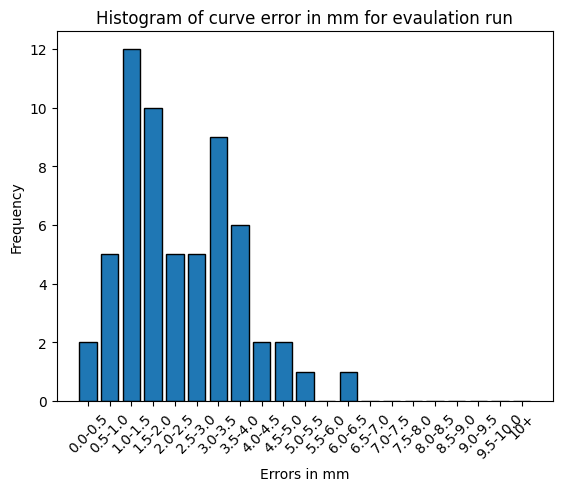

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.30
INFO:Logger:Average Furthest Distance Across Agents: 27.39
INFO:Logger:Episode 11: Total Reward = 19.64 | Final Avg Distance 2.77 | Distances in mm [0.25 0.59 0.36 0.62 0.36 0.36] | Avg Closest Point = 0.83 | Avg Furthest Point = 24.22
INFO:Logger:Episode 12: Total Reward = 20.71 | Final Avg Distance 1.70 | Distances in mm [0.25 0.12 0.37 0.61 0.12 0.37] | Avg Closest Point = 0.00 | Avg Furthest Point = 24.67
INFO:Logger:Episode 13: Total Reward = 22.20 | Final Avg Distance 4.64 | Distances in mm [1.13 0.26 0.61 1.   0.37 1.99] | Avg Closest Point = 2.38 | Avg Furthest Point = 28.28
INFO:Logger:Episode 14: Total Reward = 24.41 | Final Avg Distance 2.44 | Distances in mm [0.38 0.5  0.13 0.52 0.62 0.51] | Avg Closest Point = 0.17 | Avg Furthest Point = 27.56
INFO:Logger:Episode 15: Total Reward = 24.93 | Final Avg Distance 1.91 | Distances in mm [0.38 0.24 0.37 0.5  0.37 0.25] | Avg Close

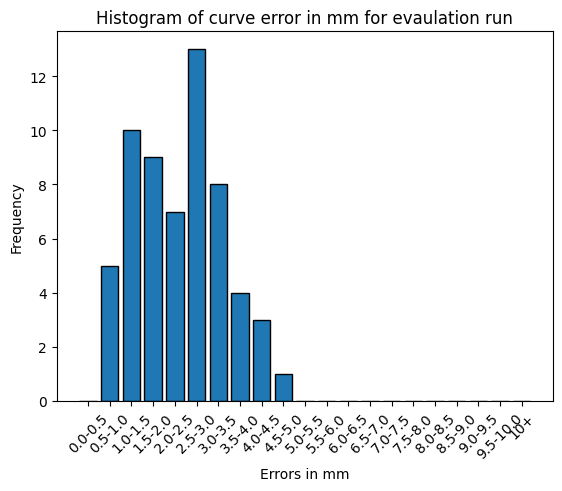

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.41
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 21: Total Reward = 22.46 | Final Avg Distance 2.86 | Distances in mm [0.69 0.55 0.   1.14 0.22 0.43] | Avg Closest Point = 1.47 | Avg Furthest Point = 27.84
INFO:Logger:Episode 22: Total Reward = 23.18 | Final Avg Distance 2.14 | Distances in mm [0.24 0.75 0.24 0.22 0.24 0.24] | Avg Closest Point = 0.17 | Avg Furthest Point = 25.74
INFO:Logger:Episode 23: Total Reward = 29.90 | Final Avg Distance 3.49 | Distances in mm [0.32 1.25 0.1  0.62 0.72 0.31] | Avg Closest Point = 1.59 | Avg Furthest Point = 34.08
INFO:Logger:Episode 24: Total Reward = 31.63 | Final Avg Distance 1.76 | Distances in mm [0.3  0.41 0.31 0.21 0.31 0.11] | Avg Closest Point = 0.33 | Avg Furthest Point = 35.72
INFO:Logger:Episode 25: Total Reward = 24.10 | Final Avg Distance 5.56 | Distances in mm [1.92 0.5  0.9  0.   1.29 0.76] | Avg Close

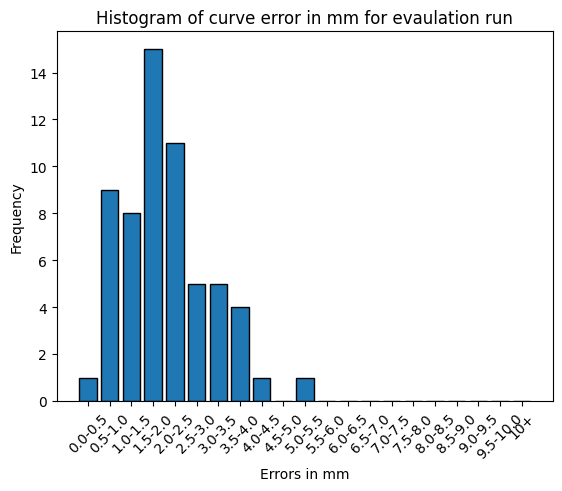

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.25
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 31: Total Reward = 20.87 | Final Avg Distance 2.94 | Distances in mm [0.46 0.55 1.23 0.57 0.11 0.  ] | Avg Closest Point = 1.63 | Avg Furthest Point = 26.42


KeyboardInterrupt: 

In [6]:
run_training(config)

In [ ]:
run_test(config)

Experiment 2: Network 3D - share positions

In [ ]:
config.experiment = Experiment.SHARE_POSITIONS

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 3: Network 3D share pairwise positions

In [ ]:
config.experiment = Experiment.SHARE_PAIRWISE

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 4: CommNet - work alone

In [7]:
config.experiment = Experiment.WORK_ALONE
config.model_type = "CommNet"

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 5: CommNet - share positions

In [ ]:
config.experiment = Experiment.SHARE_POSITIONS

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 6: CommNet - share pairwise

In [8]:
config.experiment = Experiment.SHARE_PAIRWISE

INFO:Logger:Episode 1: Total Reward = 3.19 | Final Avg Distance 18.43 | Distances in mm [1.45 8.87 1.99 1.98 4.63 3.44] | Avg Closest Point = 2.24 | Avg Furthest Point = 26.16
INFO:Logger:Episode 2: Total Reward = 7.55 | Final Avg Distance 14.07 | Distances in mm [3.31 2.78 1.19 4.64 4.63 1.06] | Avg Closest Point = 3.52 | Avg Furthest Point = 24.20
INFO:Logger:Episode 3: Total Reward = 10.61 | Final Avg Distance 11.01 | Distances in mm [1.19 5.43 0.66 1.72 0.93 2.65] | Avg Closest Point = 3.94 | Avg Furthest Point = 25.44
INFO:Logger:Episode 4: Total Reward = 15.78 | Final Avg Distance 5.84 | Distances in mm [0.66 2.25 0.93 0.66 1.72 1.33] | Avg Closest Point = 2.84 | Avg Furthest Point = 23.84
INFO:Logger:Episode 5: Total Reward = 19.40 | Final Avg Distance 14.56 | Distances in mm [1.07 1.6  0.8  6.76 2.4  4.66] | Avg Closest Point = 5.93 | Avg Furthest Point = 38.25
INFO:Logger:Episode 6: Total Reward = 15.24 | Final Avg Distance 18.72 | Distances in mm [2.14 4.14 2.94 3.33 3.06 8.3

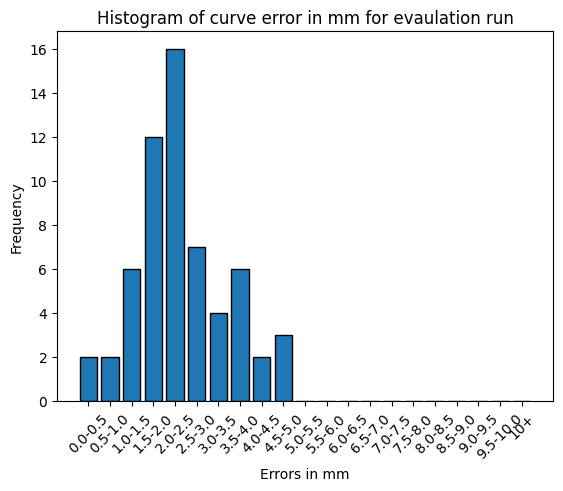

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.45
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 11: Total Reward = 11.82 | Final Avg Distance 21.86 | Distances in mm [2.17 9.46 2.46 3.92 4.05 1.04] | Avg Closest Point = 6.65 | Avg Furthest Point = 36.40
INFO:Logger:Episode 12: Total Reward = 23.56 | Final Avg Distance 10.12 | Distances in mm [1.69 3.37 1.18 3.63 1.85 0.33] | Avg Closest Point = 2.71 | Avg Furthest Point = 35.03
INFO:Logger:Episode 13: Total Reward = 10.77 | Final Avg Distance 10.88 | Distances in mm [3.08 2.12 0.75 2.34 0.26 2.96] | Avg Closest Point = 1.61 | Avg Furthest Point = 23.48
INFO:Logger:Episode 14: Total Reward = 16.01 | Final Avg Distance 5.63 | Distances in mm [0.99 1.63 0.76 1.26 0.5  0.92] | Avg Closest Point = 2.03 | Avg Furthest Point = 24.10
INFO:Logger:Episode 15: Total Reward = 17.71 | Final Avg Distance 8.61 | Distances in mm [2.17 3.18 0.76 1.48 1.23 0.25] | Avg Cl

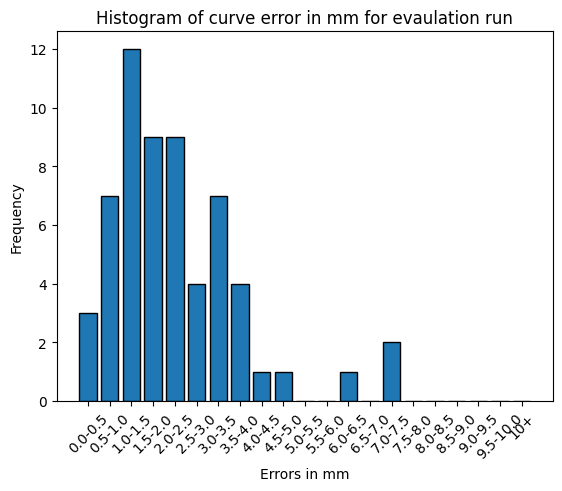

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 16.74
INFO:Logger:Average Furthest Distance Across Agents: 27.44
INFO:Logger:Episode 21: Total Reward = 13.86 | Final Avg Distance 8.55 | Distances in mm [1.03 1.58 1.55 3.18 1.09 0.88] | Avg Closest Point = 2.21 | Avg Furthest Point = 24.37
INFO:Logger:Episode 22: Total Reward = 20.20 | Final Avg Distance 2.21 | Distances in mm [0.25 0.12 0.62 0.88 0.13 0.38] | Avg Closest Point = 0.17 | Avg Furthest Point = 23.92
INFO:Logger:Episode 23: Total Reward = 22.46 | Final Avg Distance 1.36 | Distances in mm [0.   0.13 0.33 0.35 0.13 0.24] | Avg Closest Point = 0.00 | Avg Furthest Point = 24.76
INFO:Logger:Episode 24: Total Reward = 22.07 | Final Avg Distance 1.74 | Distances in mm [0.22 0.13 0.35 0.11 0.57 0.22] | Avg Closest Point = 0.00 | Avg Furthest Point = 25.29
INFO:Logger:Episode 25: Total Reward = 15.08 | Final Avg Distance 6.54 | Distances in mm [0.66 1.19 2.25 0.4  1.99 1.33] | Avg Close

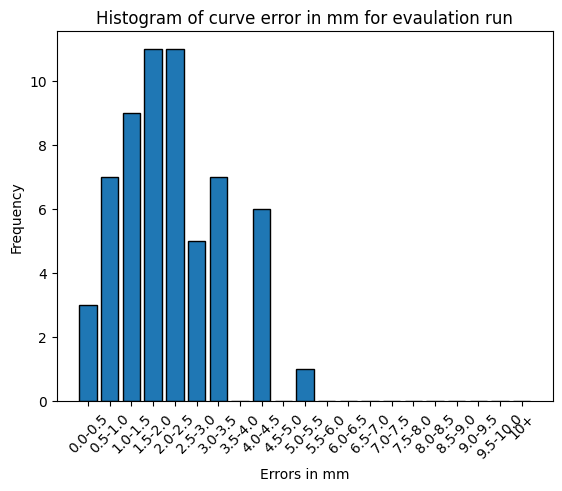

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 12.25
INFO:Logger:Average Furthest Distance Across Agents: 27.34
INFO:Logger:Episode 31: Total Reward = 21.43 | Final Avg Distance 3.88 | Distances in mm [0.69 0.79 0.41 0.89 0.67 0.43] | Avg Closest Point = 1.63 | Avg Furthest Point = 26.29
INFO:Logger:Episode 32: Total Reward = 23.32 | Final Avg Distance 1.99 | Distances in mm [0.2  0.35 0.45 0.45 0.22 0.22] | Avg Closest Point = 0.33 | Avg Furthest Point = 26.72
INFO:Logger:Episode 33: Total Reward = 21.02 | Final Avg Distance 5.29 | Distances in mm [1.14 1.25 0.48 1.53 0.75 0.78] | Avg Closest Point = 1.59 | Avg Furthest Point = 27.40
INFO:Logger:Episode 34: Total Reward = 25.11 | Final Avg Distance 1.21 | Distances in mm [0.12 0.25 0.   0.26 0.25 0.25] | Avg Closest Point = 0.00 | Avg Furthest Point = 28.64
INFO:Logger:Episode 35: Total Reward = 24.14 | Final Avg Distance 3.09 | Distances in mm [0.2  0.59 0.13 0.69 0.62 1.08] | Avg Close

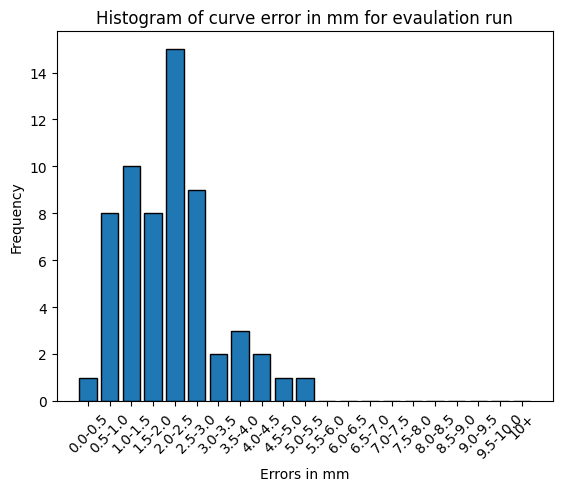

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.57
INFO:Logger:Average Furthest Distance Across Agents: 27.33


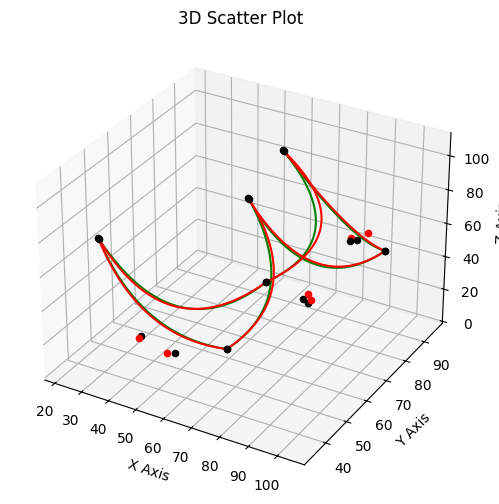

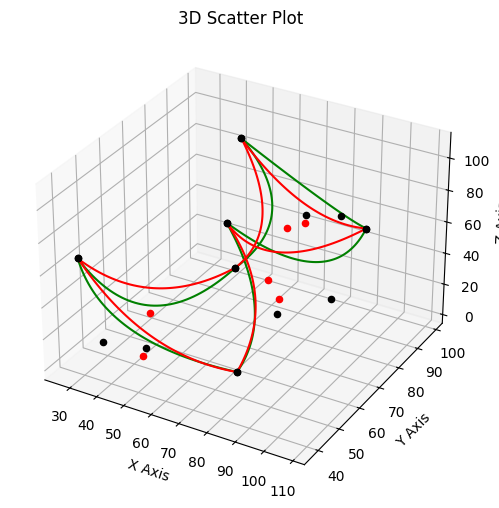

In [9]:
run_training(config)

INFO:Logger:Evaluation Episode 1: Total Reward = 11.10 | Final Average Distance = 12.23 | Error in mm [1.63 0.85 0.84 4.68 4.56 1.33] | Closest Point = [ 8.54  1.    6.08 22.36 20.62  8.31] | Furthest Point = [24.08 19.03 17.83 25.38 25.5  23.62]
INFO:Logger:Evaluation Episode 2: Total Reward = 14.10 | Final Average Distance = 8.66 | Error in mm [0.64 2.19 1.53 1.54 2.42 1.8 ] | Closest Point = [ 2.    8.66  9.27  7.07 13.04  9.49] | Furthest Point = [13.34 25.57 23.43 21.61 25.73 21.93]
INFO:Logger:Evaluation Episode 3: Total Reward = 10.38 | Final Average Distance = 16.70 | Error in mm [2.07 1.65 4.11 5.19 2.55 2.61] | Closest Point = [10.77  7.68 20.25 25.24 14.42 14.35] | Furthest Point = [27.15 22.34 23.54 29.53 25.48 30.68]
INFO:Logger:Evaluation Episode 4: Total Reward = 15.78 | Final Average Distance = 16.10 | Error in mm [2.28 2.06 2.21 3.75 2.39 1.87] | Closest Point = [15.   13.08 14.9  24.08 14.56 13.42] | Furthest Point = [23.43 33.85 31.92 33.56 35.17 28.37]
INFO:Logger:E

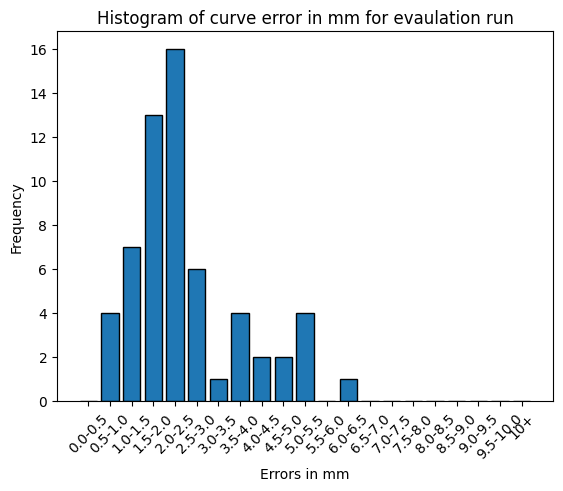

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.02
INFO:Logger:Average Furthest Distance Across Agents: 26.94


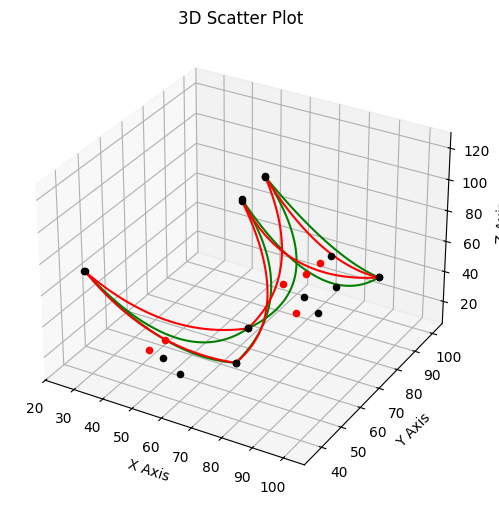

In [10]:
run_test(config)